In [2]:
%pylab inline
import pandas as pd

samtrain = pd.read_csv('/home/sophie/projects/LearnDataScience-master/datasets/samsung/samtrain.csv')
samval = pd.read_csv('/home/sophie/projects/LearnDataScience-master/datasets/samsung/samval.csv')
samtest=pd.read_csv('/home/sophie/projects/LearnDataScience-master/datasets/samsung/samtest.csv')

# Use the RandomForests package from the scikits.learn collection of algorithms
# Package name is sklearn.ensemble.RandomForestClassifier

# For the we need ot convert the target column ('activity') to integer values
# because RandomForest requires that.

# We map activity to an integer according to :
# laying = 1, sitting = 2, standing = 3, walk = 4, walkup = 5, walkdown = 6
# Code is in supporting library randomforest.py

# These names are converted to numbers via randomforest.py


Populating the interactive namespace from numpy and matplotlib


In [3]:
print samtrain.iloc[0:2,0] # what is that first column?

# Remove the spare column ('unnamed' - howd it get there?) from vals and test
samtrain.drop(samtrain.columns[0], axis=1, inplace=True)
samval.drop(samval.columns[0], axis=1, inplace=True)
samtest.drop(samtest.columns[0], axis=1, inplace=True)

print samtrain.iloc[0:2,0] # now it is removed

0    1
1    2
Name: Unnamed: 0, dtype: int64
0   -0.959434
1   -0.979289
Name: tAccMean, dtype: float64


In [118]:
cd /home/sophie/projects/Samsung/bin/

/home/sophie/projects/Samsung/bin


In [119]:
# importing the supporting randomforests.py
import randomforests as rf

samtrain = rf.remap_col(samtrain, 'activity')
samval = rf.remap_col(samval,'activity')
samtest = rf.remap_col(samtest,'activity')


In [120]:
# These are different lengths because they have a different number of volunteers data in them
print samtrain.shape
print samval.shape
print samtest.shape

# Now 'activity is in int form'
print samtrain['activity'][0:5]

(1315, 37)
(1902, 37)
(1485, 37)
0    3
1    3
2    3
3    3
4    3
Name: activity, dtype: int64


In [121]:
import sklearn.ensemble as sk

rfc = sk.RandomForestClassifier(n_estimators = 500, oob_score=True) # Using 500 trees. This is the base model?

train_data = samtrain[samtrain.columns[0:-2]] # dropping activity and subject columns
train_truth = samtrain['activity']            # putting activity into a new var

# Important to realise that .fit() is a METHOD being applied to rfc. rfc=model (as far as I can tell)
model = rfc.fit(train_data, train_truth)      # fit(X, y[, sample_weight]) 	Build a forest from the training set (X, y).
                                              # X = training input samples, y = classification labels (target values)

So what is the difference between model and rfc? Nothing. See the next two cells. 

In [122]:
# These are exactly the same
print model
print rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)


At this point we have seperated the data into input samples and classification labels(target values for the trees)
We fit them together into model using rfc.fit() to build our forest.

In [123]:
# Lets look at the oob (out of bag) score to see an estimate of the accuracy of our model
rfc.oob_score_

0.97870722433460078

In [124]:
model.oob_score_

0.97870722433460078

In [125]:
# Feature Importance. What are the top 10 important features?

fi = enumerate(rfc.feature_importances_)  # give a value of importance to each feature
cols = samtrain.columns                   # create a similar array just of array names
[(value,cols[i]) for (i, value) in fi if value > 0.04]

print rfc.feature_importances_ # this tells us the importance of each feature
print model.feature_importances_ 

print len(rfc.feature_importances_)  # How is rfc linked to model?
print len(cols)   # Note sure why we use activity and subject here too. 


[ 0.04032681  0.05118829  0.04156427  0.04440338  0.02406173  0.01086383
  0.03055529  0.01689195  0.0515442   0.05658437  0.01735149  0.00851179
  0.00824265  0.04819139  0.03443411  0.00602119  0.00429613  0.00407388
  0.01127409  0.00787828  0.03229847  0.00561677  0.00529572  0.01536894
  0.01823302  0.00853026  0.00915033  0.00890646  0.00438409  0.00400397
  0.01041084  0.00705159  0.13070362  0.17654349  0.04524329]
[ 0.04032681  0.05118829  0.04156427  0.04440338  0.02406173  0.01086383
  0.03055529  0.01689195  0.0515442   0.05658437  0.01735149  0.00851179
  0.00824265  0.04819139  0.03443411  0.00602119  0.00429613  0.00407388
  0.01127409  0.00787828  0.03229847  0.00561677  0.00529572  0.01536894
  0.01823302  0.00853026  0.00915033  0.00890646  0.00438409  0.00400397
  0.01041084  0.00705159  0.13070362  0.17654349  0.04524329]
35
37


In [126]:
# same procedure as from the training data
val_data = samval[samval.columns[0:-2]]  # leave out last two columns, subject and activity
val_truth = samval['activity']

# This time we use predict() and val_truth is not needed. why?
val_pred = rfc.predict(val_data)

In [127]:
test_data = samtest[samtest.columns[0:-2]]
test_truth = samtest['activity']
test_pred = rfc.predict(test_data)

** Prediction Errors and Computer Error Measures **

In [128]:
print ("mean accuracy score for validation set = %f " % (rfc.score(val_data, val_truth)))
print ("mean accuracy score for test set = %f" % (rfc.score(test_data, test_truth)))

mean accuracy score for validation set = 0.832282 
mean accuracy score for test set = 0.891582


In [129]:
# Use the confusion matrix to see how observations were misclassified as other activities

import sklearn.metrics as skm
test_cm = skm.confusion_matrix(test_truth, test_pred)

Visualise the confusion matrix

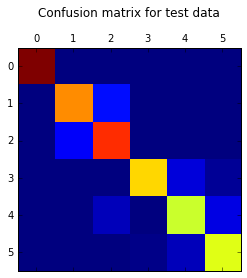

In [130]:
import pylab as pl
pl.matshow(test_cm)
pl.title('Confusion matrix for test data\n'
        + '                               ')
pl.colorbar
pl.show()



We now want to compute some other measures of prediction goodness

In [131]:
# Accuracy
print ("Accuracy = %f" %(skm.accuracy_score(test_truth,test_pred)))

Accuracy = 0.891582


In [132]:
# Precision
print ("Precision = %f" %(skm.precision_score(test_truth,test_pred)))

Precision = 0.894418


/home/sophie/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


In [133]:
# Recall
print ("Recall = %f" %(skm.recall_score(test_truth,test_pred)))

Recall = 0.891582


/home/sophie/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


In [134]:
# F1 Score
print ("F1 score = %f" %(skm.f1_score(test_truth,test_pred)))

F1 score = 0.892030


/home/sophie/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
